In [1]:
#Tratamiento de datos
import pandas as pd 
import numpy as np 

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# ver todas las columnas
pd.set_option('display.max_columns', None)
# ver todas las filas
pd.set_option('display.max_rows', None)

## EXPLORACIÓN Y UNIÓN DE LOS DATOS ORIGINALES:

In [2]:
df_activity = pd.read_csv('Customer Flight Activity.csv', on_bad_lines='skip')

In [3]:
df_loyalty = pd.read_csv('Customer Loyalty History.csv', on_bad_lines='skip')

In [4]:
#Función EDA BÁSICO Para explorar los datos antes del merge:

def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________')

    print('🌋Descripción de los datos no-numéricos:')
    if df.select_dtypes(include='object').shape[1] > 0:
        display(df.describe(include='object').T)
    else:
        print('No hay columnas no-numéricas.')
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Que datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

    print('🪹 Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('________________________________________________________________________________________________________')
    
    return

In [5]:
eda_basico(df_activity)

🌷Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
18799,139479,2017,2,0,0,0,0,0.0,0,0
34801,154172,2017,3,8,0,8,1648,164.0,0,0
10204,642449,2017,1,0,0,0,0,0.0,0,0


________________________________________________________________________________________________________
🌻Número de Filas:


405624

________________________________________________________________________________________________________
🌱Número de Columnas:


10

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

None

________________________________________________________________________________________________________
🧬 Tipos de datos por columna:


int64      9
float64    1
Name: count, dtype: int64

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:
No hay columnas no-numéricas.
________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

________________________________________________________________________________________________________
🐖Que datos son nulos por columnas:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
cantidad de duplicados: 1864
Primeros duplicados


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
No hay columnas constantes
________________________________________________________________________________________________________


In [6]:
eda_basico(df_loyalty)

🌷Ejemplo de datos del DF:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4296,715369,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,78170.0,Married,Nova,2797.76,Standard,2012,10,NaN,NaN
8543,666504,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,69660.0,Married,Nova,9404.45,Standard,2012,9,NaN,NaN
4968,539370,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,94568.0,Married,Nova,3309.25,Standard,2017,4,NaN,NaN


________________________________________________________________________________________________________
🌻Número de Filas:


16737

________________________________________________________________________________________________________
🌱Número de Columnas:


16

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    

None

________________________________________________________________________________________________________
🧬 Tipos de datos por columna:


object     9
float64    4
int64      3
Name: count, dtype: int64

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

________________________________________________________________________________________________________
🐖Que datos son nulos por columnas:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________


In [7]:
#El primer paso es eliminar las filas duplicadas del df_activity:

df_activity.drop_duplicates(inplace=True)

#Comprobar que se han eliminado:
print(df_activity.duplicated().sum())

0


In [8]:
#Ahora unimos los dos df para empezar la limpieza:

df_customer = df_activity.merge(df_loyalty, how='left')  

#No hace falta poner on ya que la columna se llama igual

## LIMPIEZA DE DATOS

In [9]:
#EDA del nuevo DF para visualizar los datos:

eda_basico(df_customer)

🌷Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
403759,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
35132,183626,2017,3,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,88413.0,Married,Star,5789.85,Standard,2017,6,NaN,NaN
333373,837408,2018,8,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 6J7,Male,College,NaN,Single,Star,2315.09,Standard,2013,9,2016.0,3.0
328437,576057,2018,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,99444.0,Married,Nova,2759.98,Standard,2018,5,NaN,NaN


________________________________________________________________________________________________________
🌻Número de Filas:


403760

________________________________________________________________________________________________________
🌱Número de Columnas:


25

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null 

None

________________________________________________________________________________________________________
🧬 Tipos de datos por columna:


int64      11
object      9
float64     5
Name: count, dtype: int64

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

________________________________________________________________________________________________________
🐖Que datos son nulos por columnas:


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________


## TRATAMIENTO DE NULOS

In [10]:
# Que porcentage de nulos tengo?

print('🐖Que porcentaje de nulos tenemos por columnas:')
porc_nulos = (df_customer.isnull().sum() / df_customer.shape[0]) * 100
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
display(df_nulos[df_nulos["%_nulos"] > 0])

🐖Que porcentaje de nulos tenemos por columnas:


,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


### Columna SALARY:

In [11]:
# Tengo datos raros en la columna salario (en negativo), voy a ver que pasa.

negativos = df_customer[df_customer['Salary'] < 0]
print(f'Cantidad de salarios negativos: {negativos.shape[0]}')

Cantidad de salarios negativos: 480


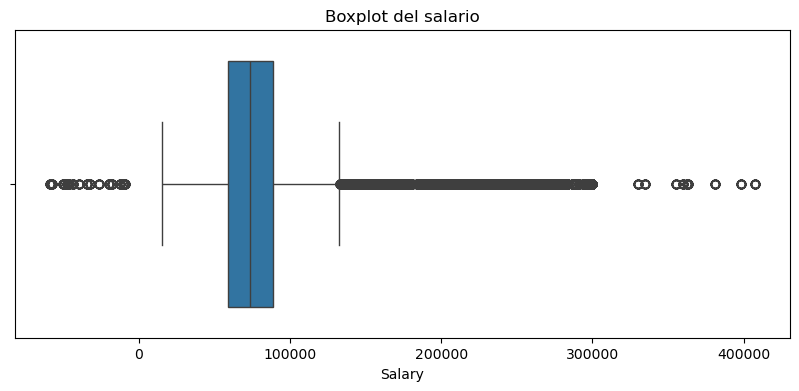

In [12]:
# Visualizar los datos atipicos con BOXPLOT:

salary_data = df_customer['Salary'].dropna()

plt.figure(figsize=(10, 4))
sns.boxplot(x=salary_data)
plt.title('Boxplot del salario')
plt.xlabel('Salary')
plt.show()

In [13]:
#Me regunto si podré rellenar estas filas negativas si encuentro el mismo usuario con un salario positivo. 

usuarios_con_salario_neg = df_customer[df_customer['Salary'] < 0]['Loyalty Number'].unique()

# Filas con salario positivo
salarios_positivos = df_customer[df_customer['Salary'] > 0]

# Usuarios con salario positivo
usuarios_con_salario_pos = salarios_positivos['Loyalty Number'].unique()

# Intersección entre ambos conjuntos
usuarios_con_doble_registro = np.intersect1d(usuarios_con_salario_neg, usuarios_con_salario_pos)

print(f"Usuarios con salario negativo y también salario positivo: {len(usuarios_con_doble_registro)}")

#Con la intersección de Numpy veo que no y por lo tanto mi teoria de eliminar estas filas (afectan a la media y mediana) es correcta. 

Usuarios con salario negativo y también salario positivo: 0


In [14]:
#Eliminar las filas que tienen datos negativos en el salario:

df_customer = df_customer[(df_customer['Salary'] >= 0) | (df_customer['Salary'].isna())]  #--> Esto evita que elimine también los valores nulo


#Compruebo que ya no queden valores negativos:

negativos = df_customer[df_customer['Salary'] < 0]
print(f'Cantidad de salarios negativos: {negativos.shape[0]}')

Cantidad de salarios negativos: 0


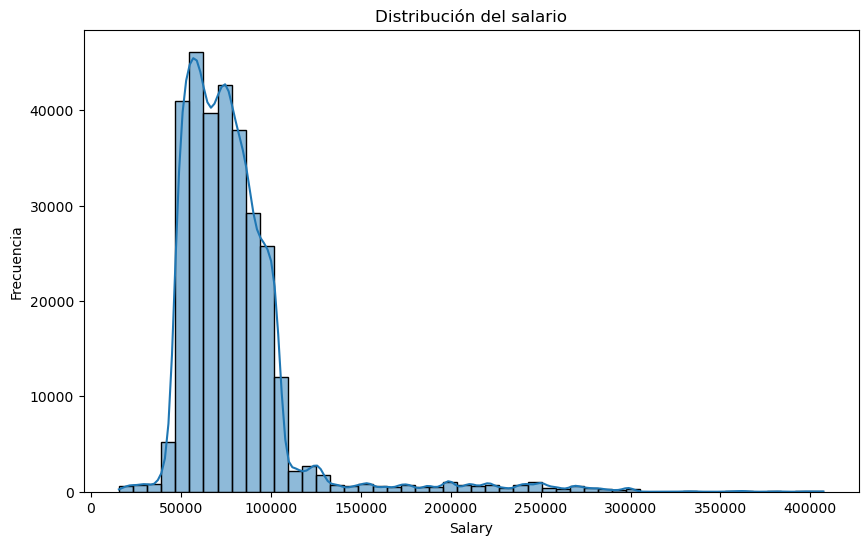

In [15]:
#Distribución del salario:

salary_data = df_customer['Salary'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(salary_data, bins=50, kde=True)
plt.title('Distribución del salario')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()

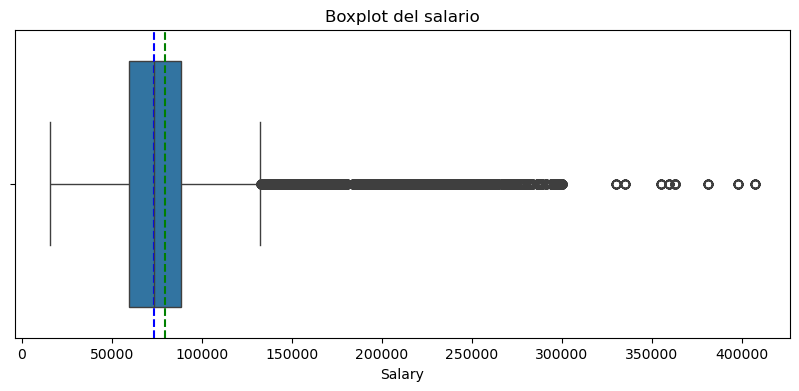

In [16]:
# Tengo valores atipicos dentro de la columna Salary?

plt.figure(figsize=(10, 4))
sns.boxplot(x=salary_data)
plt.title('Boxplot del salario')
plt.axvline(salary_data.mean(), color='green', linestyle='--', label='Media')
plt.axvline(salary_data.median(), color='blue', linestyle='--', label='Mediana')
plt.xlabel('Salary')
plt.show()


#Esto nos indica que hay pocos outliers


In [17]:
#Como la distribución es simetrica y no hay muchos outliers imputo la media:

df_customer['Salary'].fillna(df_customer['Salary'].mean(), inplace=True)

### Columna Cancellation Year:

In [18]:
#Relleno la de year con un dato como 1900 para identificarla luego si quiero separar los customers que se han dado de baja que los que siguen.

df_customer['Cancellation Year'] = df_customer['Cancellation Year'].fillna("1900")

### Columna Cancellation Month:

In [19]:
#Decido en bse a las preguntas a resolver que no es necesaria dada la cantidad de nulos > 87%, así que la elimino:

df_customer.drop('Cancellation Month', axis=1, inplace=True)

In [20]:
#Compruebo los nulos:

try:
    print('🐖Porcentaje de nulos tenemos por columnas:')
    porc_nulos = (df_customer.isnull().sum() / df_customer.shape[0]) * 100
    df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

    if df_nulos[df_nulos['%_nulos'] > 0].empty:
        print('No existen nulos en tu DF')

    else: 
        display(df_nulos[df_nulos["%_nulos"] > 0])

except Exception as e:
    print(f"Hubo un error al comprobar los nulos: {e}")

🐖Porcentaje de nulos tenemos por columnas:
No existen nulos en tu DF


In [21]:
#Cambiar el tipo de dato de la columna POINTS ACCUMULATED de float a INT:

columnas_a_convertir = ['Points Accumulated', 'Cancellation Year']
df_customer[columnas_a_convertir] = df_customer[columnas_a_convertir].astype('int')

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403280 entries, 0 to 403759
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403280 non-null  int64  
 1   Year                         403280 non-null  int64  
 2   Month                        403280 non-null  int64  
 3   Flights Booked               403280 non-null  int64  
 4   Flights with Companions      403280 non-null  int64  
 5   Total Flights                403280 non-null  int64  
 6   Distance                     403280 non-null  int64  
 7   Points Accumulated           403280 non-null  int32  
 8   Points Redeemed              403280 non-null  int64  
 9   Dollar Cost Points Redeemed  403280 non-null  int64  
 10  Country                      403280 non-null  object 
 11  Province                     403280 non-null  object 
 12  City                         403280 non-null  object 
 13  Post

In [22]:
df_customer.to_csv('Customer_data_clean.csv')